Name Sarah Brannum

Labpartner(s) Miriam

In [ ]:
#import statements go here
import pandas as pd

# Class 12.1

# Warmups 12.1

Note: finish this for lab if you don't finish in class.

Log into the Supermike III LSU HPC using ssh (in the terminal)

**W.1.** Last time we went over the following basic unix/linux commands:
- ls
- pwd
- cd
- scp
- scp -r

What do each of these do? If you forgot, you can type "man ls", etc. to see the documentation.

ls=lists files in the directory you are in
pwd=prints working directory (directory you are curretnly in)
cd=moves to that directory
scp=sends a file from one place to another
scp -r=to move an entire folder instead of 1 file

**W.2** Navigate to your /work/user directory on mike. Move a copy of your final project proposal from your computer to your work directory and submit a screen shot of this directory with the file with your lab.

**W.3** Look up the LSU HPC documentation for /work and /home, what is the difference? What are the quotas for each? How long will files last? Are they backed up?

There are 2 different directories where 1 is designed for holding files permanently while the other is used to store output that can be transfered to the local computer.
home directory has 5GB of storage and will last forever.
Work directory has no storage limit, but can purge after 90 days. It is better for temporary storage. 
Neither of the directories are backed up

# Lecture 12.1

### Agenda:


Some useful things to do with a timeseries
- datetime objects
- basic line fitting
- moving averages
- detrending

#### Datetime Objects in python and pandas

Python has a wonderful feature called datetime objects. These are super-useful if you are dealing with any data that has a timestamp. They are a bit tricky to get used to, but worth the effort, and the alternatives are usually much more painful (trust me on this one). 

Documentation: 
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
- https://docs.python.org/3/library/datetime.html

There is a lot you can do with these. Here we will just cover the basics. Dig in to the documentation if you need something specfic.

Note that Victoria used these in her sample code to make movie frames for HYCOM data: https://github.com/chsharrison/Sci_comp_F24/blob/main/Course_materials/movie_demo_2024.ipynb

In [1]:
from datetime import datetime, timedelta
import pandas as pd

#### Defining a specfic date

In [2]:
date1 = datetime(1996,1,1) #year month day hour minutes

In [3]:
# this is a datetime object
date1

datetime.datetime(1996, 1, 1, 0, 0)

In [4]:
# print out the date
print(date1)

1996-01-01 00:00:00


In [5]:
# you can also format the date as a string however you like (useful for plots)
date1.strftime("%m/%d/%Y")

'01/01/1996'

In [6]:
# defining a date with hours, minutes and seconds
date2 = datetime(1996,1,1, 13, 34, 6) # note using 24 clock (miltary time) here

In [7]:
print(date2)

1996-01-01 13:34:06


In [8]:
#what is going to happen here?
date2.strftime("%m-%d-%Y")

'01-01-1996'

In [10]:
date1.today() #somehow it knows what timezone I am (probably from my computer)

datetime.datetime(2024, 11, 12, 15, 30, 6, 519674)

#### If we want to increment the date we can use timedelta

In [11]:
date1 = date1 + timedelta(days=1)
print(date1)

1996-01-02 00:00:00


In [12]:
date1 = date1 + timedelta(minutes = 2, seconds=1)
print(date1)

1996-01-02 00:02:01


In [13]:
# you can also do things like add fractional days
date1 = date1 + timedelta(days=1.5)
print(date1)

1996-01-03 12:02:01


We can find the time difference between two dates

In [14]:
timediff = date2-date1
timediff

datetime.timedelta(days=-2, seconds=5525)

#### We can also define timeseries using pandas 

In [15]:
pd.date_range?

Signature:
pd.date_range(
    start=None,
    end=None,
    periods=None,
    freq=None,
    tz=None,
    normalize: 'bool' = False,
    name: 'Hashable | None' = None,
    inclusive: 'IntervalClosedType' = 'both',
    *,
    unit: 'str | None' = None,
    **kwargs,
) -> 'DatetimeIndex'
Docstring:
Return a fixed frequency DatetimeIndex.

Returns the range of equally spaced time points (where the difference between any
two adjacent points is specified by the given frequency) such that they all
satisfy `start <[=] x <[=] end`, where the first one and the last one are, resp.,
the first and last time points in that range that fall on the boundary of ``freq``
(if given as a frequency string) or that are valid for ``freq`` (if given as a
:class:`pandas.tseries.offsets.DateOffset`). (If exactly one of ``start``,
``end``, or ``freq`` is *not* specified, this missing parameter can be computed
given ``periods``, the number of timesteps in the range. See the note below.)

Parameters
----------
st

In [24]:
# note the default is daily
my_daterange = pd.date_range(start='1/1/2018', end='1/08/2018')
# includes the last date unlike python arrays

In [25]:
my_daterange

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [18]:
# this can be indexed like any array
my_daterange[0]
# note the result is a timestamp, which is similar to a datetime object, but not exactly

Timestamp('2018-01-01 00:00:00')

In [19]:
print(my_daterange[1])

2018-01-02 00:00:00


In [21]:
# you can convert a datetime to a timestamp
pd.Timestamp(datetime(2012, 5, 1))

Timestamp('2012-05-01 00:00:00')

In [27]:
# we can also specfiy the frequency
my_daterange2 = pd.date_range(start='1/1/2018',end = '12/1/2021', freq='M')
my_daterange2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30'],
              dtype='datetime64[ns]', freq='M')

See the documentation for lots more functionality

### Working with timeseries data: global sea surface temperature (SST)

We are going to be using some data from the epa website here: https://www.epa.gov/climate-indicators/climate-change-indicators-sea-surface-temperature

This is globally averaged Extended Reconstructed Sea Surface Temperature (ERSST)v.4 from NOAA, which combines satilite, ship and other in situ (in place, i.e. in the water) data. If you follow the links on the above you can get the gridded (i.e. map) product in netcdf format for the latest product (v.5). We are just going to play around with the globally averaged data

In [28]:
sst= pd.read_csv('https://www.epa.gov/system/files/other-files/2024-06/sea-surface-temp_fig-1.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 247: invalid start byte

In [ ]:
https://www.epa.gov/system/files/other-files/2024-06/sea-surface-temp_fig-1.csv

In [29]:
sst= pd.read_csv('https://www.epa.gov/system/files/other-files/2024-06/sea-surface-temp_fig-1.csv',
                encoding = 'latin1')

In [30]:
sst

,"Figure 1. Average Global Sea Surface Temperature, 1880-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Source: EPA's Climate Change Indicators in the...,NaN,NaN,NaN
1,"Data source: NOAA, 2024",NaN,NaN,NaN
2,Web update: June 2024,NaN,NaN,NaN
3,Units: temperature anomaly (°F),NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
145,2019,0.878,0.822,0.935
146,2020,0.846,0.804,0.888
147,2021,0.668,0.622,0.714
148,2022,0.743,0.701,0.786


In [31]:
sst= pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv',
                 index_col = 0, # this makes the year the index
                  header = 6,
                 #skiprows = [0,1,2,3,4,5], # this works too, need to skip all the comments
                 encoding ='latin1' # had to do this to get it to work, thanks stack exchange
                )

In [32]:
sst

,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval
Year,,,
1880,-0.470009,-0.672646,-0.267371
1881,-0.356879,-0.560588,-0.153169
1882,-0.372661,-0.575728,-0.169594
1883,-0.448443,-0.650804,-0.246082
1884,-0.589754,-0.790478,-0.389030
...,...,...,...
2011,0.428674,0.133289,0.724058
2012,0.528696,0.232869,0.824523
2013,0.584674,0.289227,0.880122


<Axes: xlabel='Year'>

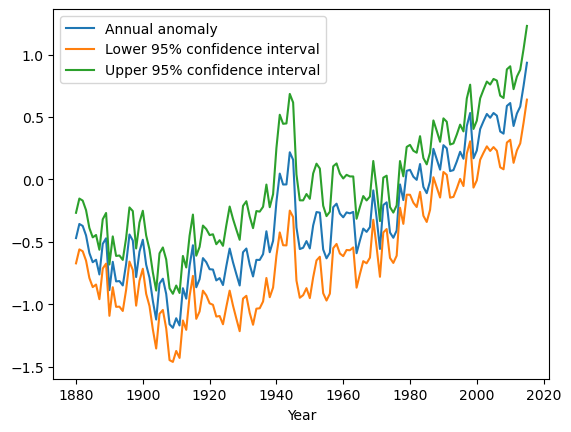

In [33]:
sst.plot()

In [34]:
#Set plotting formats
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [13.0, 6.0]
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.0

<Axes: xlabel='Year'>

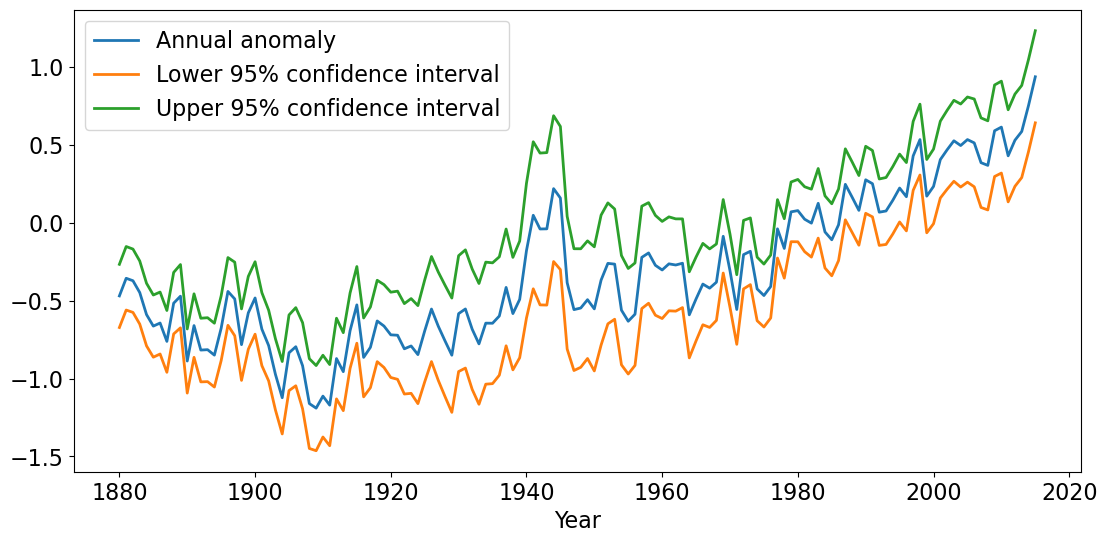

In [35]:
sst.plot()

1850 is usually considered the beginning of the industrial revolution, so before human affected climate by burning fossil fuels (but we did major land use changes and had impacts on many species' extinctions)

There is a definate trend in the data, with a big excursion in the 1940s

Let's ask some research questions. We will start these in lecture and you will finish them in lab:
- What is the trend in this data, that is how fast is SST increasing with time? 
- If we choose a different window for the trend analysis, how does this affect the answer?
- What causes all the interannual variablilty? If we detrend the data how does it look? Can we compare this with climate variabiltiy indices?
- What happened in the 1940s?

see: https://www.newscientist.com/article/dn11639-climate-myths-the-cooling-after-1940-shows-co2-does-not-cause-warming/

I am much more comfortable doing data analysis in xarray so I'm converting the pandas dataframe to an xarray dataset

In [36]:
import xarray as xr

In [37]:
sst_ds = sst.to_xarray()

In [38]:
sst_ds

<xarray.Dataset> Size: 4kB
Dimensions:                        (Year: 136)
Coordinates:
  * Year                           (Year) int64 1kB 1880 1881 1882 ... 2014 2015
Data variables:
    Annual anomaly                 (Year) float64 1kB -0.47 -0.3569 ... 0.9356
    Lower 95% confidence interval  (Year) float64 1kB -0.6726 -0.5606 ... 0.6401
    Upper 95% confidence interval  (Year) float64 1kB -0.2674 -0.1532 ... 1.231

If we want, we can add a pandas date range to this timeseries and use this for plotting. Not super needed here because it's annual, but would be useful if it was monthly or daily.

In [40]:
ssha_dates = pd.date_range(start = '1880', end = '2015', freq='Y')

In [41]:
ssha_dates

DatetimeIndex(['1880-12-31', '1881-12-31', '1882-12-31', '1883-12-31',
               '1884-12-31', '1885-12-31', '1886-12-31', '1887-12-31',
               '1888-12-31', '1889-12-31',
               ...
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31'],
              dtype='datetime64[ns]', length=135, freq='A-DEC')

In [42]:
# let's just work with the annual anomaly

sst_ds["Annual anomaly"] # note a lot of the syntax in xarray is similar to pandas

<xarray.DataArray 'Annual anomaly' (Year: 136)> Size: 1kB
array([-0.4700088, -0.3568788, -0.3726612, -0.448443 , -0.5897538,
       -0.6636546, -0.6439392, -0.7616232, -0.5166342, -0.4717926,
       -0.8875836, -0.6603264, -0.8173098, -0.8148276, -0.84978  ,
       -0.6772536, -0.4412844, -0.4894326, -0.78255  , -0.578736 ,
       -0.4833054, -0.6831072, -0.7883226, -0.9732618, -1.123038 ,
       -0.8347986, -0.795843 , -0.917685 , -1.160703 , -1.189773 ,
       -1.112769 , -1.1706066, -0.8718498, -0.9557658, -0.6931926,
       -0.5274864, -0.8644752, -0.7996338, -0.6306858, -0.6633414,
       -0.7196544, -0.7222464, -0.8093034, -0.7910208, -0.8465382,
       -0.6946722, -0.554238 , -0.6640884, -0.7589772, -0.8502282,
       -0.5835816, -0.5537106, -0.683568 , -0.7777674, -0.6447312,
       -0.6452784, -0.5988258, -0.4155462, -0.5834772, -0.4924098,
       -0.1797678,  0.0471582, -0.0406296, -0.039807 ,  0.2180826,
        0.157752 , -0.3853548, -0.5579568, -0.5477346, -0.4941792,
       -0.5531796, -0.368496 , -0.2612952, -0.2661372, -0.5613282,
       -0.632412 , -0.5871312, -0.2226618, -0.1943208, -0.2735424,
       -0.3035772, -0.2642508, -0.2717028, -0.260397 , -0.5913306,
       -0.489249 , -0.39411  , -0.4203576, -0.38187  , -0.0876366,
       -0.3086334, -0.5571756, -0.2051676, -0.1836738, -0.4251924,
       -0.4675428, -0.4096278, -0.0397692, -0.165393 ,  0.0692586,
        0.0771966,  0.0219924, -0.0032202,  0.1239354, -0.0596304,
       -0.109917 , -0.0137916,  0.2456388,  0.1634436,  0.0785898,
        0.274842 ,  0.2497932,  0.0669942,  0.0748224,  0.1436454,
        0.2219328,  0.1661922,  0.428193 ,  0.5327244,  0.1698606,
        0.2325024,  0.4042188,  0.4671414,  0.5250798,  0.4946364,
        0.5327874,  0.5114556,  0.3846042,  0.3673116,  0.5894424,
        0.6127182,  0.4286736,  0.528696 ,  0.5846742,  0.7512552,
        0.935577 ])
Coordinates:
  * Year     (Year) int64 1kB 1880 1881 1882 1883 1884 ... 2012 2013 2014 2015

#### Let's do a linear fit of the whole timeseries

Linear regression is simply fitting a line to some data, assuming that the data is on a straight line with the equation y=**m**x+**b**, where x and y are the independent and dependent data, **m** is the slope, and **b** is the intercept. Linear regression finds m and b by minimizing the distance of all the data points to a line, getting the best fit, using calculus. See:

https://plainenglish.io/blog/linear-regression-for-dummies

https://en.wikipedia.org/wiki/Linear_regression


In [43]:
from scipy import stats

In [44]:
stats.linregress?

Signature: stats.linregress(x, y=None, alternative='two-sided')
Docstring:
Calculate a linear least-squares regression for two sets of measurements.

Parameters
----------
x, y : array_like
    Two sets of measurements.  Both arrays should have the same length.  If
    only `x` is given (and ``y=None``), then it must be a two-dimensional
    array where one dimension has length 2.  The two sets of measurements
    are then found by splitting the array along the length-2 dimension. In
    the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
    equivalent to ``linregress(x[0], x[1])``.
alternative : {'two-sided', 'less', 'greater'}, optional
    Defines the alternative hypothesis. Default is 'two-sided'.
    The following options are available:

    * 'two-sided': the slope of the regression line is nonzero
    * 'less': the slope of the regression line is less than zero
    * 'greater':  the slope of the regression line is greater than zero

    .. versionadded:: 1.7.

In [45]:
# the syntax for this function is x,y, so time, ssta
ssta_trend_entire = stats.linregress(sst_ds.Year, sst_ds["Annual anomaly"])

In [46]:
ssta_trend_entire

LinregressResult(slope=0.010013503267496782, intercept=-19.822035179626454, rvalue=0.8362694544139663, pvalue=8.796275453011977e-37, stderr=0.0005671794277975704, intercept_stderr=1.104806345521059)

In [47]:
ssta_trend_entire.slope

0.010013503267496782

The value I am interested in is the slope, what is this? What are the units?
- Rate that temperature is increasing (degrees F/Year)

Let's plot the line to see the fit. The equation is y = mx + b, where m is the slope and b is the intercept, what are x and y in this case?
- x is time
- y is temprature

In [48]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'SSTA ($\\degree$F)')

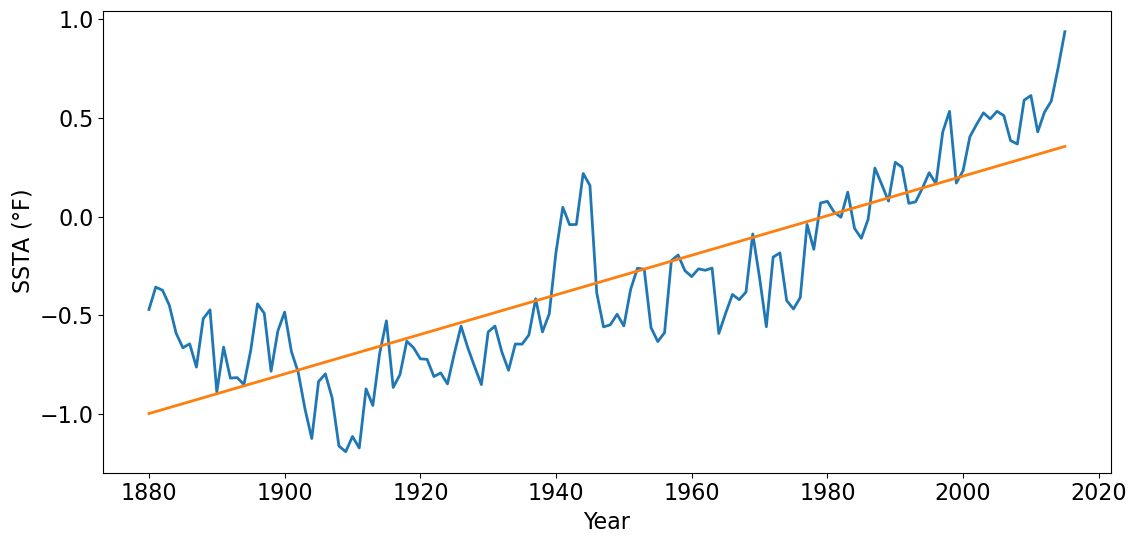

In [49]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

How good of a fit is this for the last few decades?
It's not so good, the trend is faster, steeper

#### Let's do a linear fit for the last few decades and see what we get.

How do we access the later data?

In [55]:
sst_ds.Year[100:]

<xarray.DataArray 'Year' (Year: 36)> Size: 288B
array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype=int64)
Coordinates:
  * Year     (Year) int64 288B 1980 1981 1982 1983 1984 ... 2012 2013 2014 2015

In [56]:
sst_ds["Annual anomaly"][100:]

<xarray.DataArray 'Annual anomaly' (Year: 36)> Size: 288B
array([ 0.0771966,  0.0219924, -0.0032202,  0.1239354, -0.0596304,
       -0.109917 , -0.0137916,  0.2456388,  0.1634436,  0.0785898,
        0.274842 ,  0.2497932,  0.0669942,  0.0748224,  0.1436454,
        0.2219328,  0.1661922,  0.428193 ,  0.5327244,  0.1698606,
        0.2325024,  0.4042188,  0.4671414,  0.5250798,  0.4946364,
        0.5327874,  0.5114556,  0.3846042,  0.3673116,  0.5894424,
        0.6127182,  0.4286736,  0.528696 ,  0.5846742,  0.7512552,
        0.935577 ])
Coordinates:
  * Year     (Year) int64 288B 1980 1981 1982 1983 1984 ... 2012 2013 2014 2015

In [57]:
# the syntax for this function is x,y, so time, ssta
ssta_trend_1980_on = stats.linregress(sst_ds.Year[100:], sst_ds["Annual anomaly"][100:])

In [58]:
ssta_trend_1980_on

LinregressResult(slope=0.020711260308880312, intercept=-41.05951991698843, rvalue=0.8829830021529423, pvalue=1.0383113887943804e-12, stderr=0.0018882626420977894, intercept_stderr=3.7718556347573635)

In [59]:
ssta_trend_1980_on.slope # 0.02 F/ year. 0.2 F /10 years

0.020711260308880312

Text(0, 0.5, 'SSTA ($\\degree$F)')

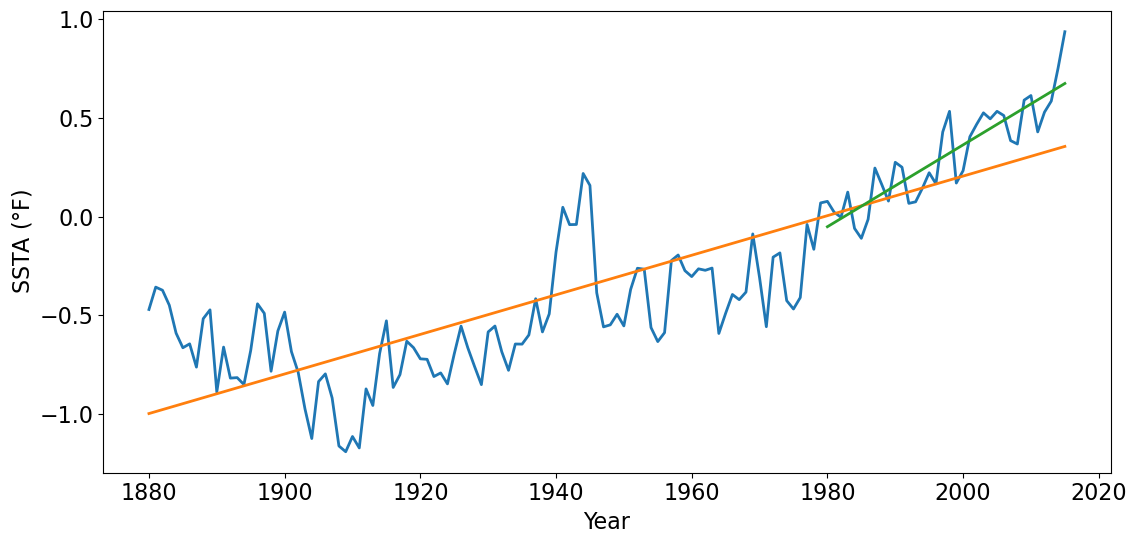

In [60]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.plot(sst_ds.Year[100:], ssta_trend_1980_on.slope*sst_ds.Year[100:] + ssta_trend_1980_on.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

#### Detrending the data
Let's say we were interested in the variability outside of the trend. How do we detrend the data?

In [67]:
# First I am going to make the line, as I plotted before
trend_entire = ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept


In [68]:
# Then I will subtract the trend, the line
sst_detrended = sst_ds["Annual anomaly"] - trend_entire

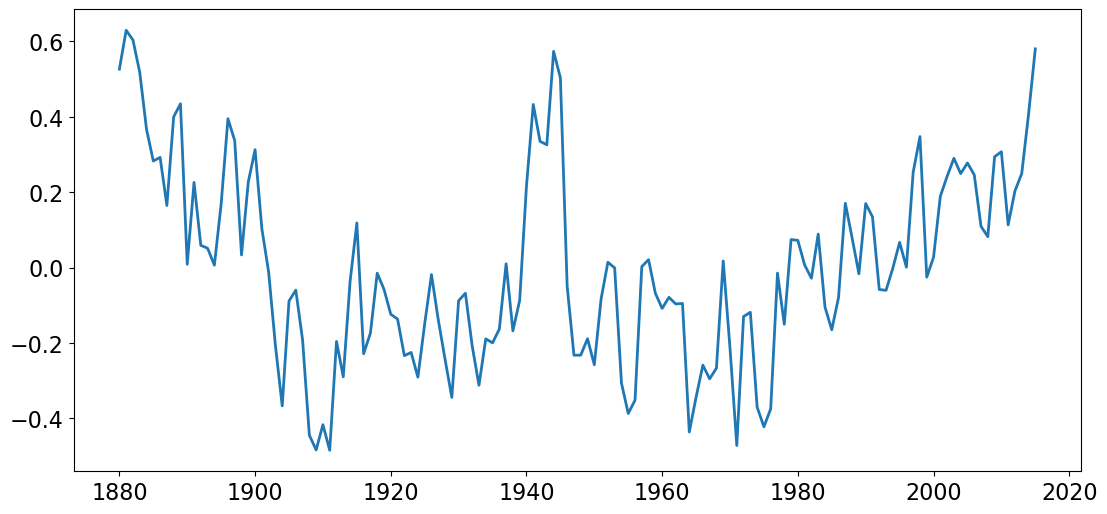

In [69]:
plt.plot(sst_ds.Year, sst_detrended)

#### Creating a moving average, i.e. filtering or smoothing.
Let's say we wanted to smooth the data to remove some of the variability, how would we do this?

I want to do a three year running mean, so for each datapoint, average the year before, the current year and the year after and save that to the current year as the new data.

if i is my current year index

(data[j+1] + data [j] + data [j-1])/3 to average the three years of data

Going to have to start at the second year, since I don't have a previous year


pseudo code:

create an array to save the new data in

Loop through all the years
 take a mean of the current, previous and next years, save to some new arrray


In [70]:
import numpy as np

In [71]:
sst_ds["Annual anomaly"].shape

(136,)

In [72]:
# initialize my array
ssta_filtered = np.zeros(136)

for i in range(134): # loop through all the years, skip the last index
    #print(i+1) #skip the first index
    ssta_filtered[i+1] = (sst_ds["Annual anomaly"][i] + sst_ds["Annual anomaly"][i+1] + sst_ds["Annual anomaly"][i+2])/3


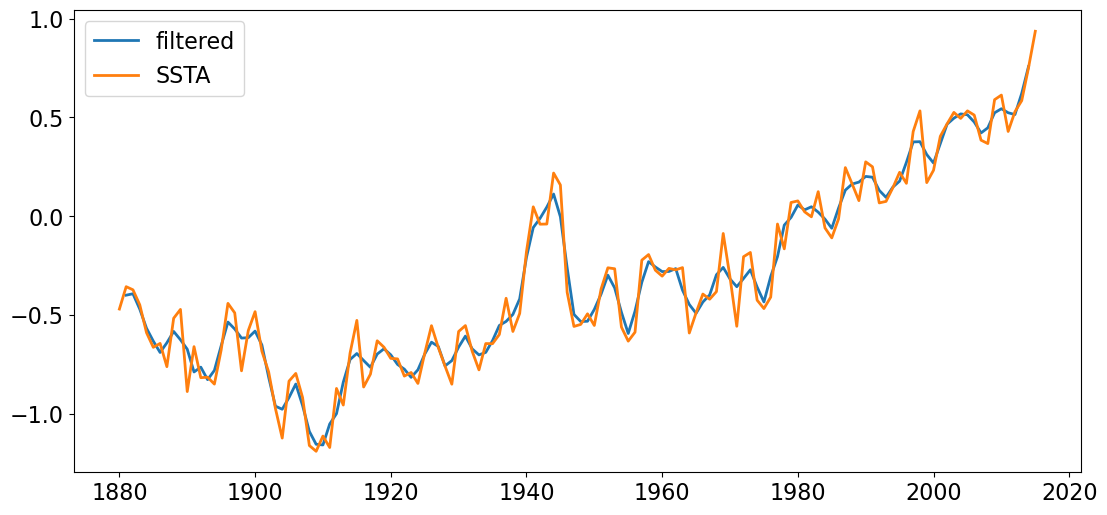

In [73]:
plt.plot(sst_ds.Year[1:-1],ssta_filtered[1:-1], label = "filtered")
plt.plot(sst_ds.Year,sst_ds["Annual anomaly"], label = 'SSTA')
plt.legend()

# Lab 12.1

**E.1** Define a datetime object that is your birthday. Increment this date using timedelta by a) ten weeks, b) five minutes, c) two years (tricky!) Hint: see help(timedelta)

In [77]:
help(timedelta)

Help on class timedelta in module datetime:

class timedelta(builtins.object)
 |  Difference between two datetime values.
 |  
 |  timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)
 |  
 |  All arguments are optional and default to 0.
 |  Arguments may be integers or floats, and may be positive or negative.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      True if self else False
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  

In [80]:
birthday=datetime(1998,10,18)
print('birthday: '+birthday.strftime("%m/%d/%Y %H:%M:%S"))
birthday_ten=birthday+timedelta(days=70)
print('birthday+10 weeks: '+birthday_ten.strftime("%m/%d/%Y"))
birthday_five=birthday+timedelta(minutes=70)
print('birthday+10 weeks: '+birthday_five.strftime("%m/%d/%Y %H:%M:%S"))
birthday_year=birthday+timedelta(days=365*2+1) #2000 is a leap year
print('birthday+2 years: '+birthday_year.strftime("%m/%d/%Y %H:%M:%S"))

birthday: 10/18/1998 00:00:00
birthday+10 weeks: 12/27/1998
birthday+10 weeks: 10/18/1998 01:10:00
birthday+2 years: 10/18/2000 00:00:00


**E.2** Define a daterange for your birthday every year of your life

In [122]:
birthdays=pd.date_range(start='10/18/1998', end='10/18/2024',freq=pd.DateOffset(years=1))
birthdays

DatetimeIndex(['1998-10-18', '1999-10-18', '2000-10-18', '2001-10-18',
               '2002-10-18', '2003-10-18', '2004-10-18', '2005-10-18',
               '2006-10-18', '2007-10-18', '2008-10-18', '2009-10-18',
               '2010-10-18', '2011-10-18', '2012-10-18', '2013-10-18',
               '2014-10-18', '2015-10-18', '2016-10-18', '2017-10-18',
               '2018-10-18', '2019-10-18', '2020-10-18', '2021-10-18',
               '2022-10-18', '2023-10-18', '2024-10-18'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

**E.3** Print all your birthdays out as month, day, year (no minutes, etc)

In [ ]:
birthdays

**E.4** Do a linear fit of the SSTA data from 1940 to 1970. What trend do you get? How confident are you in this result? How does it compare to the trends we did in lecture (use quantitative data to explain).

In [94]:
# years from 1880 to 2015
line_end=1970-1880
print(line_end)
line_start=1940-1880
print(line_start)
# start from 1940=

line_fit_1940_1970=stats.linregress(sst_ds.Year[60:90], sst_ds["Annual anomaly"][60:90])
print(line_fit_1940_1970.slope)

90
60
-0.00902015399332592


Text(0, 0.5, 'SSTA ($\\degree$F)')

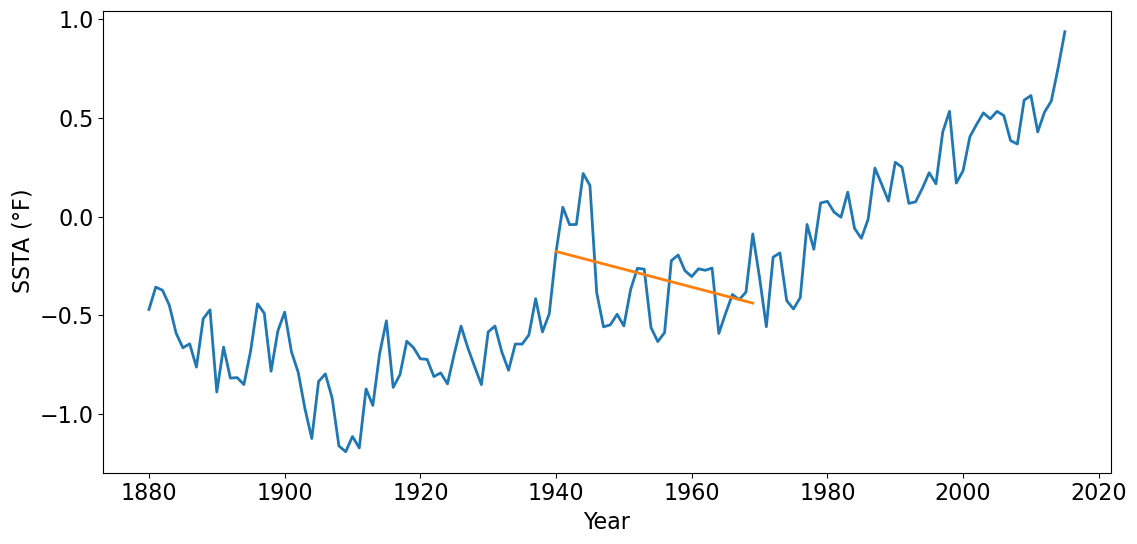

In [93]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year[60:90], line_fit_1940_1970.slope*sst_ds.Year[60:90] + line_fit_1940_1970.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

The trend has a negative slope of -0.01 degrees per year, which is not what the rest of the range look like. Because we used the range 1940-1970 with overall decreasing temperatures, the trendline is negative. The results look a bit scattered around the line with large variability between the actual numbers and the trendline itself.

**E.5** According to the internet, what might have caused this decline in SST during this perioud? Write a few sentances explaining this and cite your sources here.

The decrease in temperature is primarily due to increased aerosols in the atmosphere. This was after WW2 where advances in technology were increasing exponentially, and emissions from factories etc. increased greatly. The increased aerosols in the atmosphere reflected solar radiation and limiting its ability to hit the surface of the ocean and warm the water up. Therefore, the aerosols covered the atmosphere in a way that limited solar radiation from entering the Earth, causing cooling of the oceans.


Source: Thompson, D., Wallace, J., Kennedy, J. et al. An abrupt drop in Northern Hemisphere sea surface temperature around 1970. Nature 467, 444–447 (2010). https://doi.org/10.1038/nature09394

**E.6** Detrend from 1970 on and plot your result. Compare this to an ENSO (El Nino) index and speculate on what may have caused this interannual variability. How does ENSO affect SST and why?

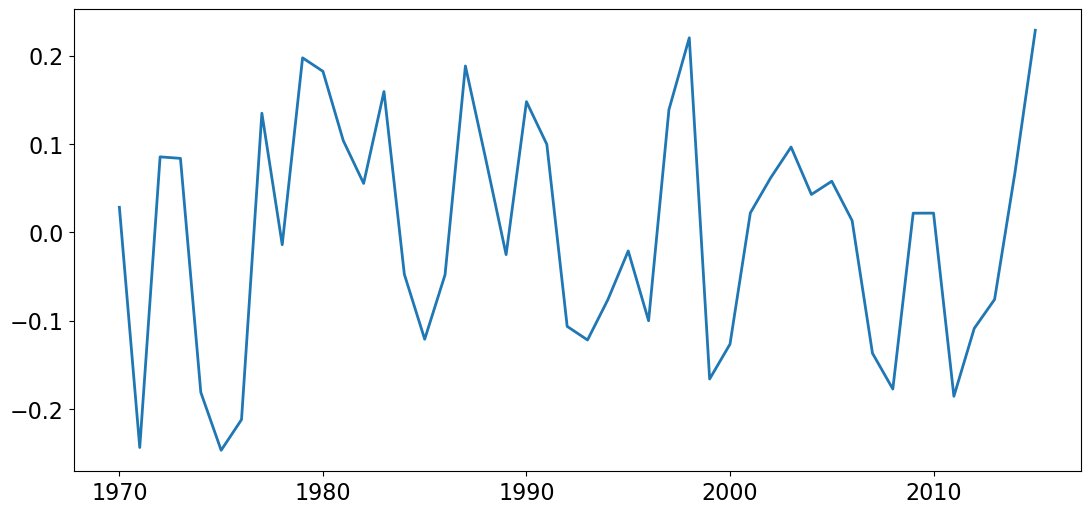

In [104]:
# detrended from 1970 (
line_fit_1970_on=stats.linregress(sst_ds.Year[90:], sst_ds["Annual anomaly"][90:])
trend_entire = line_fit_1970_on.slope*sst_ds.Year[90:] + line_fit_1970_on.intercept

sst_1970_on=sst_ds["Annual anomaly"][90:]
sst_detrended = sst_ds["Annual anomaly"][90:] - trend_entire

plt.plot(sst_ds.Year[90:], sst_detrended)

#print(sst_1970_on)
#sst_ds["Annual anomaly"][100:]

ENSO is every 2-7 yeears. The periodicity of sections of years with elevated temperature anamolies correlate to the periodicity of ENSO.

**E.7** Perform a five year moving average of your detrended data from E.6. Explain your result in relation to the periodicity of ENSO.

In [108]:
sst_detrended

<xarray.DataArray (Year: 46)> Size: 368B
array([ 0.0283066 , -0.243434  ,  0.08537561,  0.08367102, -0.18104597,
       -0.24659476, -0.21187815,  0.13478206, -0.01404013,  0.19741308,
        0.18215269,  0.1037501 ,  0.0553391 ,  0.15929631, -0.04746788,
       -0.12095287, -0.04802586,  0.18820615,  0.08281256, -0.02523963,
        0.14781418,  0.09956699, -0.1064304 , -0.1218006 , -0.07617599,
       -0.02108698, -0.10002597,  0.13877644,  0.22010945, -0.16595274,
       -0.12650933,  0.02200868,  0.06173289,  0.0964729 ,  0.0428311 ,
        0.05778371,  0.01325352, -0.13679627, -0.17728726,  0.02164515,
        0.02172256, -0.18552043, -0.10869642, -0.07591661,  0.067466  ,
        0.2285894 ])
Coordinates:
  * Year     (Year) int64 368B 1970 1971 1972 1973 1974 ... 2012 2013 2014 2015

In [110]:
ssta_filtered = np.zeros(len(sst_detrended))

for i in range(len(sst_detrended)-2): # loop through all the years, skip the last index
    #print(i+1) #skip the first index
    ssta_filtered[i+1] = (sst_detrended[i] + sst_detrended[i+1] + sst_detrended[i+2])/3


In [117]:
len(sst_ds.Year[90:])

<xarray.DataArray 'Year' (Year: 46)> Size: 368B
array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)
Coordinates:
  * Year     (Year) int64 368B 1970 1971 1972 1973 1974 ... 2012 2013 2014 2015

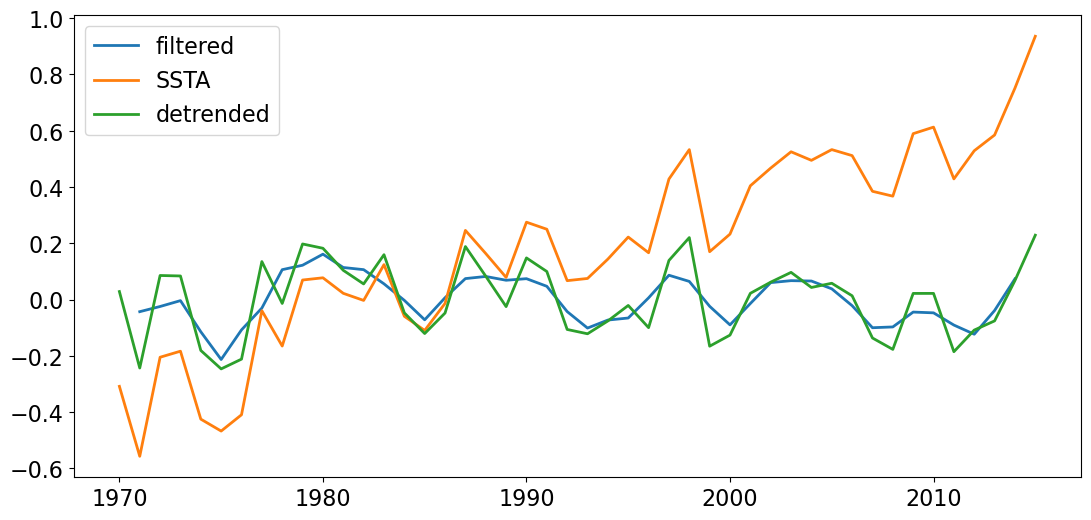

In [120]:
plt.plot(sst_ds.Year[91:-1],ssta_filtered[1:-1], label = "filtered")
plt.plot(sst_ds.Year[90:],sst_ds["Annual anomaly"][90:], label = 'SSTA')
plt.plot(sst_ds.Year[90:], sst_detrended, label = "detrended")
plt.legend()

The perdiocity of the SST with the filter is about every 5 years, which correlates to the ENSO cycle. 

**Notes** Make notes for yourself on progamming tecniques and commands you learned in the this week, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.